<a href="https://colab.research.google.com/github/Series-Parallel/Machine_in_Learning/blob/main/fcc_bike_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import StandardScaler
import copy
import seaborn as sns
import tensorflow as tf
from sklearn.linear_model import LinearRegression

In [2]:
dataset_cols = [ "bike_count", "hour", "temp","humidity","wind", "visibility","dew_pt_temp","radiation","rain","snow","functional"]
df = pd.read_csv("SeoulBikeData.csv",encoding='cp949').drop(["Date","Holiday","Seasons"],axis=1)

In [3]:
df.head()

,Rented Bike Count,Hour,Temperature(캜),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(캜),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Functioning Day
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Yes
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Yes
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Yes
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Yes
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Yes


In [4]:
df.columns = dataset_cols
df["functional"]=(df["functional"]=="Yes").astype(int)
df = df[df["hour"] == 12]
df = df.drop("hour",axis=1)

In [5]:
df.head()

,bike_count,temp,humidity,wind,visibility,dew_pt_temp,radiation,rain,snow,functional
12,449,1.7,23,1.4,2000,-17.2,1.11,0.0,0.0,1
36,479,4.3,41,1.3,1666,-7.8,1.09,0.0,0.0,1
60,333,5.8,85,1.7,349,3.4,0.43,0.0,0.0,1
84,393,-0.3,38,4.8,1823,-12.9,1.11,0.0,0.0,1
108,321,-2.3,25,0.0,1962,-19.7,0.00,0.0,0.0,1


In [6]:
df.tail()

,bike_count,temp,humidity,wind,visibility,dew_pt_temp,radiation,rain,snow,functional
8652,752,9.1,57,1.1,562,1.0,1.69,0.0,0.0,1
8676,672,9.3,61,1.5,390,2.1,0.85,0.0,0.0,1
8700,635,7.9,14,1.7,1688,-18.0,1.81,0.0,0.0,1
8724,661,5.6,27,0.3,1522,-11.9,0.34,0.0,0.0,1
8748,720,6.6,35,1.3,1409,-7.8,1.70,0.0,0.0,1


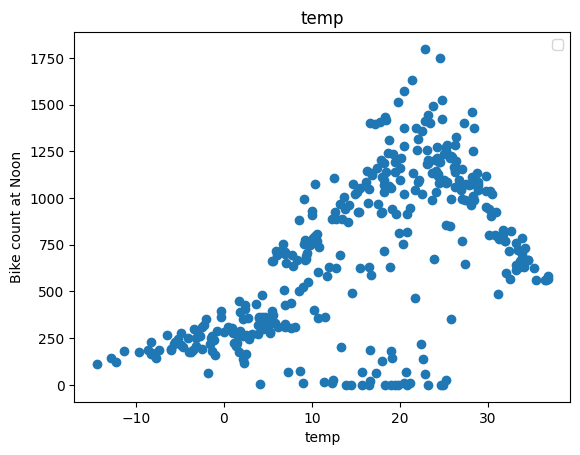

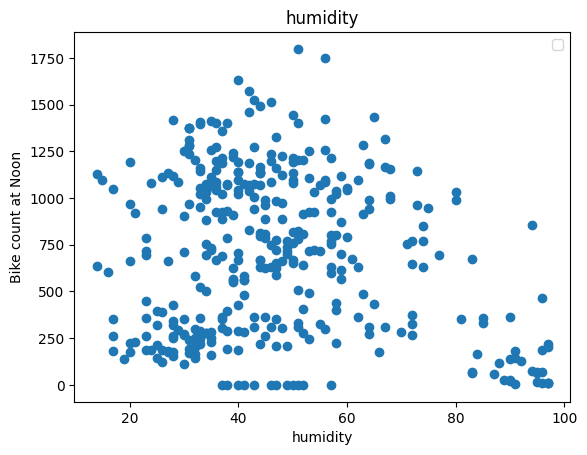

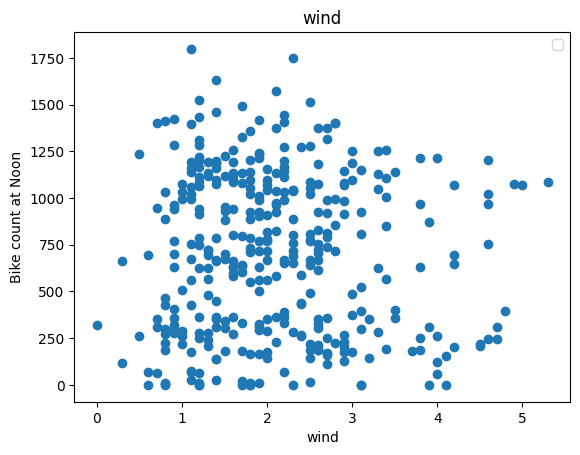

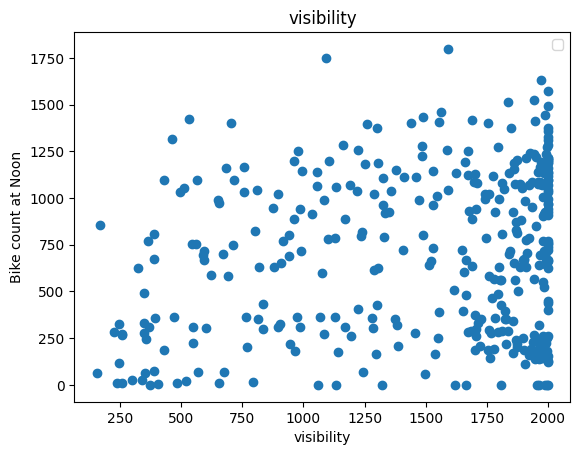

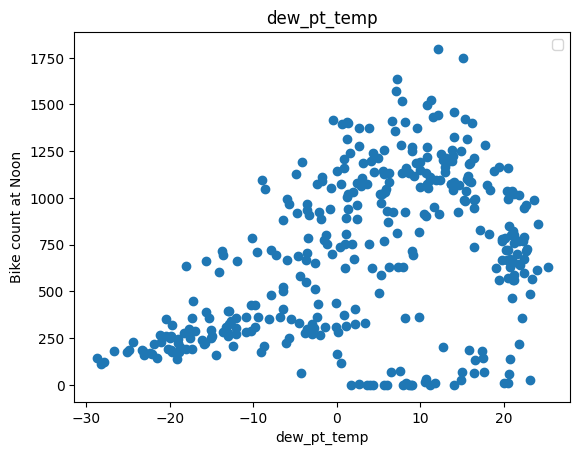

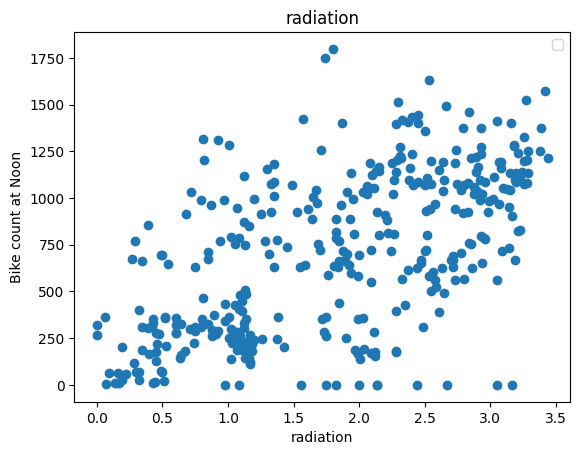

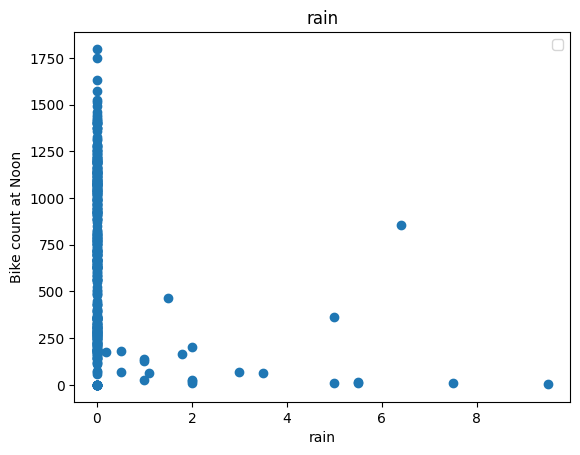

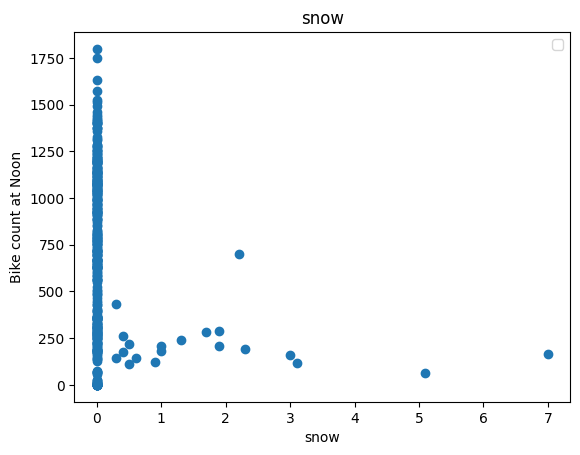

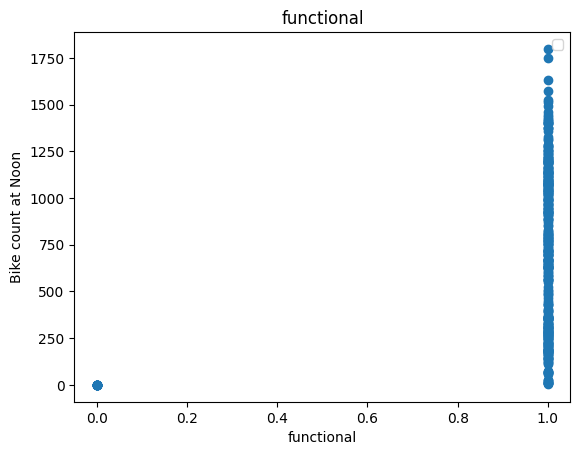

In [7]:
for label in df.columns[1:]:
  plt.scatter(df[label],df["bike_count"])
  plt.title(label)
  plt.ylabel("Bike count at Noon")
  plt.xlabel(label)
  plt.legend()
  plt.show()

In [8]:
df = df.drop(["wind","visibility","functional"],axis=1)

In [9]:
df.head()

,bike_count,temp,humidity,dew_pt_temp,radiation,rain,snow
12,449,1.7,23,-17.2,1.11,0.0,0.0
36,479,4.3,41,-7.8,1.09,0.0,0.0
60,333,5.8,85,3.4,0.43,0.0,0.0
84,393,-0.3,38,-12.9,1.11,0.0,0.0
108,321,-2.3,25,-19.7,0.00,0.0,0.0


Train/Valid/Test Dataset

In [10]:
train, val, test = np.split(df.sample(frac=1), [int(0.6*len(df)), int(0.8*len(df))])

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [19]:
def get_xy(dataframe, y_label, x_labels=None):
  dataframe= copy.deepcopy(dataframe)
  # Check if x_labels is None or empty list
  if x_labels is None or not x_labels:
    X= dataframe.drop[[c for c in dataframe.columns if c!=y_label]].values
  else:
    if len(x_labels) == 1:
      X= dataframe[x_labels[0]].values.reshape(-1,1)
    else:
      X= dataframe[x_labels].values

  y= dataframe[y_label].values.reshape(-1,1)
  data = np.hstack((X,y))
  return data, X, y

In [20]:
_, X_train_temp, y_train_temp = get_xy(train, "bike_count", x_labels=["temp"])
_, X_val_temp, y_val_temp = get_xy(val, "bike_count", x_labels=["temp"])
_, X_test_temp, y_test_temp = get_xy(test, "bike_count", x_labels=["temp"])

In [21]:
temp_reg = LinearRegression()
temp_reg.fit(X_train_temp,y_train_temp)

LinearRegression()

In [22]:
print(temp_reg.coef_)
print(temp_reg.intercept_)

[[21.28737698]]
[367.01133554]


In [23]:
temp_reg.score(X_train_temp,y_train_temp)

0.3474138860718702

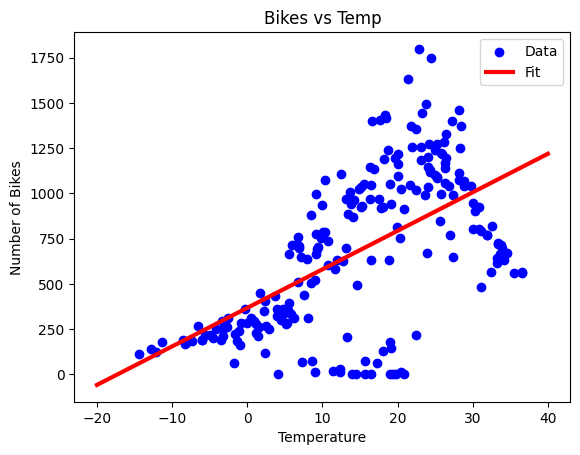

In [24]:
plt.scatter(X_train_temp, y_train_temp, label="Data", color="blue")
x=tf.linspace(-20, 40, 100)
plt.plot(x, temp_reg.predict(np.array(x).reshape(-1,1)), label="Fit", color="red", linewidth=3)
plt.legend()
plt.title("Bikes vs Temp")
plt.ylabel("Number of Bikes")
plt.xlabel("Temperature")
plt.show()

In [25]:
def get_xy(dataframe, y_label, x_labels=None):
  dataframe= copy.deepcopy(dataframe)
  if x_labels is None or x_labels.empty:
    X= dataframe.drop[[c for c in dataframe.columns if c!=y_label]].values
  else:
    if len(x_labels) == 1:
      X= dataframe[x_labels[0]].values.reshape(-1,1)
    else:
      X= dataframe[x_labels].values

  y= dataframe[y_label].values.reshape(-1,1)
  data = np.hstack((X,y))
  return data, X, y


In [26]:
train, val, test = np.split(df.sample(frac=1), [int(0.6*len(df)), int(0.8*len(df))])
_, X_train_all, y_train_all = get_xy(train, "bike_count", x_labels=df.columns[1:])
_, X_val_all, y_val_all = get_xy(val, "bike_count", x_labels=df.columns[1:])
_, X_test_all, y_test_all = get_xy(test, "bike_count",x_labels=df.columns[1:])

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [27]:
all_reg = LinearRegression()
all_reg.fit(X_train_all,y_train_all)

LinearRegression()

In [28]:
all_reg.score(X_train_all,y_train_all)

0.4889223388353653

Regression with Neural Net


In [29]:
temp_normalizer = tf.keras.layers.Normalization(input_shape=(1,),axis=None)
temp_normalizer.adapt(X_train_temp.reshape(-1))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [30]:
temp_nn_model = tf.keras.Sequential([
    temp_normalizer,
    tf.keras.layers.Dense(1)
])

In [31]:
temp_nn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),loss='mean_squared_error')

In [32]:
history = temp_nn_model.fit(X_train_temp.reshape(-1), y_train_temp, verbose =0, epochs =1000, validation_data=(X_val_temp,y_val_temp))

In [34]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.xlabel('Epoch')
  plt.ylabel('MSE')
  plt.legend()
  plt.grid(True)
  plt.show()

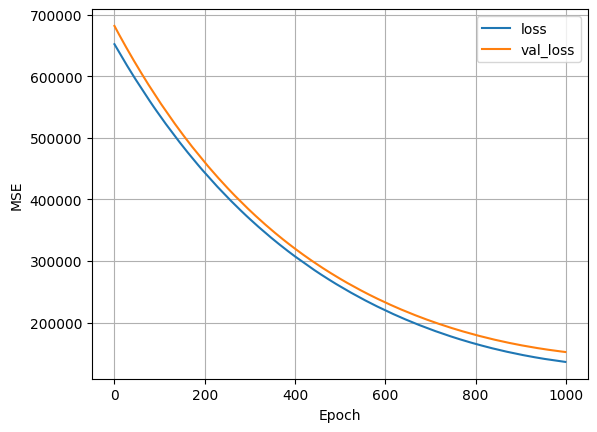

In [35]:
plot_loss(history)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


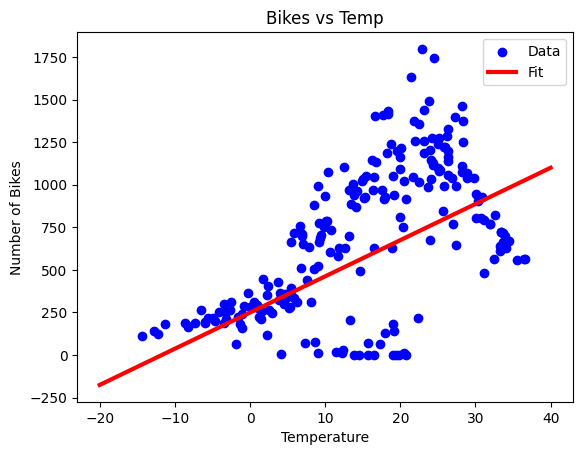

In [36]:
plt.scatter(X_train_temp, y_train_temp, label="Data", color="blue")
x=tf.linspace(-20, 40, 100)
plt.plot(x, temp_nn_model.predict(np.array(x).reshape(-1,1)), label="Fit", color="red", linewidth=3)
plt.legend()
plt.title("Bikes vs Temp")
plt.ylabel("Number of Bikes")
plt.xlabel("Temperature")
plt.show()

Neural Net

In [40]:
temp_normalizer = tf.keras.layers.Normalization(input_shape=(1,), axis=None)
temp_normalizer.adapt(X_train_temp.reshape(-1))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [41]:
nn_model = tf.keras.Sequential([
    temp_normalizer,
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1)
])
nn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),loss='mean_squared_error')

In [42]:
history = nn_model.fit(
    X_train_temp, y_train_temp, verbose =0, epochs =1000, validation_data=(X_val_temp,y_val_temp))

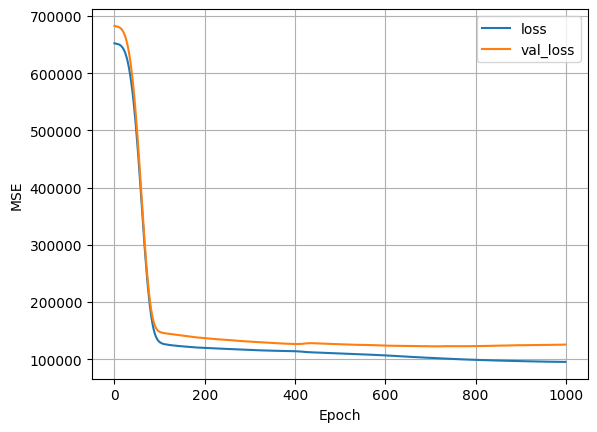

In [44]:
plot_loss(history)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


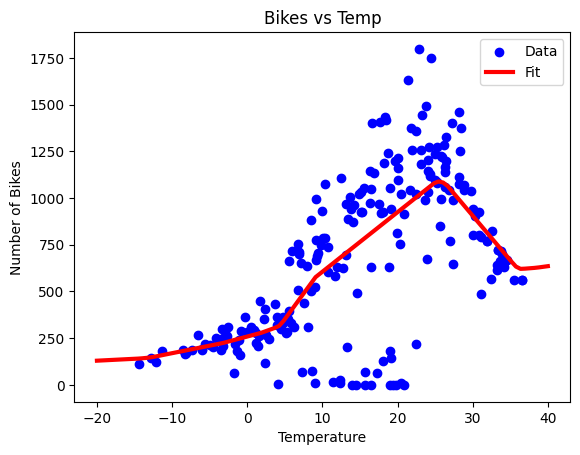

In [45]:
plt.scatter(X_train_temp, y_train_temp, label="Data", color="blue")
x=tf.linspace(-20, 40, 100)
plt.plot(x, nn_model.predict(np.array(x).reshape(-1,1)), label="Fit", color="red", linewidth=3)
plt.legend()
plt.title("Bikes vs Temp")
plt.ylabel("Number of Bikes")
plt.xlabel("Temperature")
plt.show()

In [73]:
all_normalizer = tf.keras.layers.Normalization(input_shape=(6,), axis=None)
all_normalizer.adapt(X_train_all)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [74]:
nn_model = tf.keras.Sequential([
    all_normalizer,
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1)
])
nn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),loss='mean_squared_error')

In [59]:
history = nn_model.fit(
    X_train_all, y_train_all, verbose =0, epochs =1000, validation_data=(X_val_all,y_val_all))

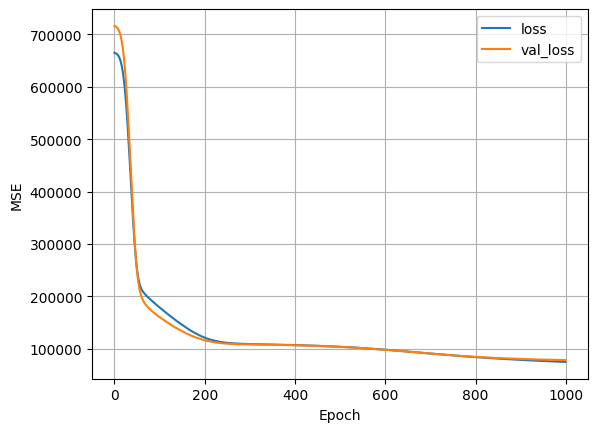

In [60]:
plot_loss(history)

In [75]:
#calculatng the MSE for linear reg and nn
y_pred_lr = all_reg.predict(X_test_all)
y_pred_nn = nn_model.predict(X_test_all)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


In [76]:
y_pred_nn = y_pred_nn[:len(y_test_all)]

In [77]:
def MSE(y_pred, y_real):
  y_pred = y_pred.reshape(-1, 1)
  return (np.square(y_pred-y_real)).mean()

In [78]:
MSE(y_pred_lr,y_test_all)

102066.69829918716

In [82]:
MSE(y_pred_nn, y_test_all)

657600.6741645479

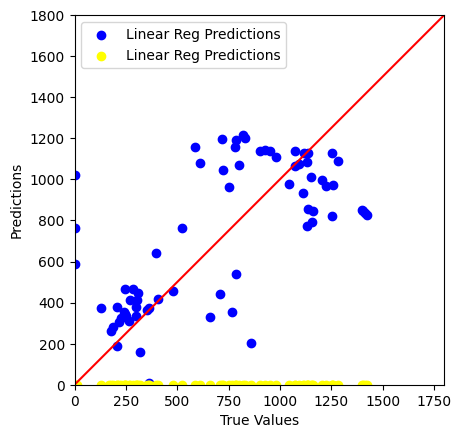

In [86]:
ax = plt.axes(aspect='equal')
plt.scatter(y_test_all, y_pred_lr, label="Linear Reg Predictions", color="blue")
plt.scatter(y_test_all, y_pred_nn, label="Linear Reg Predictions", color="yellow")
plt.xlabel("True Values")
plt.ylabel("Predictions")
lims = [0, 1800]
plt.xlim(lims)
plt.ylim(lims)
_=plt.plot(lims, lims, color="red")
plt.legend()